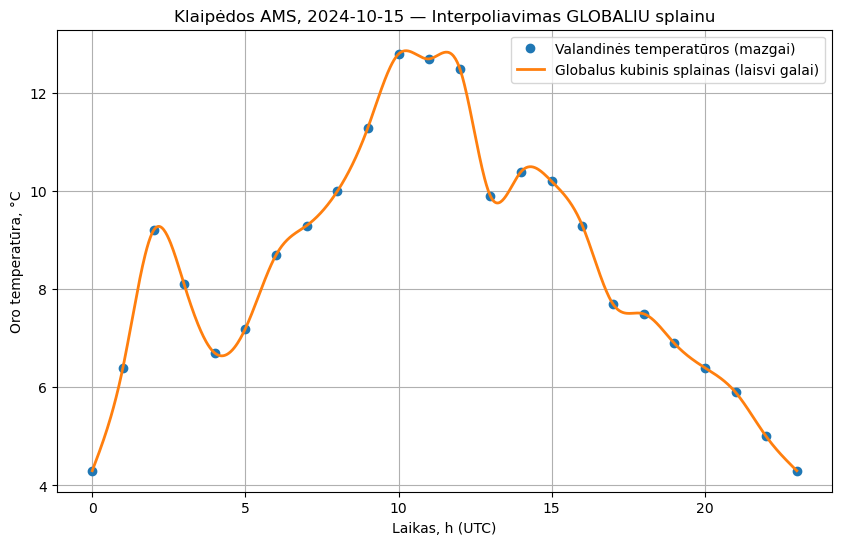

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------
# 1) Valandiniai duomenys iš Klaipėdos AMS 2024-10-15
# --------------------------------------------
x = np.arange(0, 24, dtype=float)

y = np.array([
    4.3, 6.4, 9.2, 8.1, 6.7, 7.2, 8.7, 9.3, 10.0, 11.3, 12.8, 12.7,
    12.5, 9.9, 10.4, 10.2, 9.3, 7.7, 7.5, 6.9, 6.4, 5.9, 5.0, 4.3
], dtype=float)

# --------------------------------------------
# 2) Skaičiuojame globalų kubinį splainą
# --------------------------------------------
# intervalų skaičius
n = len(x) - 1

# d_i = atstumai tarp mazgų
d = np.diff(x)

# Matricą A ir dešine puse rhs vidinėms lygtims
A = np.zeros((n-1, n-1))
rhs = np.zeros(n-1)

# Formuojame tridiagonalę matricą pagal splaino lygtis
for i in range(1, n):
    im = i-1
    A[im, im] += 2*(d[i-1] + d[i])

    if i-2 >= 0:
        A[im, im-1] = d[i-1]

    if im+1 <= n-2:
        A[im, im+1] = d[i]

    # dešinioji pusė pagal formulę
    rhs[im] = 6 * ((y[i+1]-y[i]) / d[i] - (y[i]-y[i-1]) / d[i-1])

# antrosios išvestines mazguose
m = np.zeros(n+1)

# Sprendžiame sistemą tik vidiniams m_i
if n-1 > 0:
    m[1:n] = np.linalg.solve(A, rhs)

# --------------------------------------------
# 3) Splaino vertinimas bet kuriame taške xx
# --------------------------------------------
def eval_cubic_spline(xq):
    xq = np.atleast_1d(xq)
    yq = np.empty_like(xq, dtype=float)

    # Randame, į kurį intervalą patenka xq
    idx = np.clip(np.searchsorted(x, xq) - 1, 0, n-1)

    # s = atstumas nuo x_i iki xq
    s = xq - x[idx]

    di = d[idx]

    # Splaino formulės nariai
    term1 = y[idx]
    term2 = ((y[idx+1]-y[idx]) / di - (2*m[idx] + m[idx+1]) * di / 6.0) * s
    term3 = (m[idx] / 2.0) * s**2
    term4 = ((m[idx+1] - m[idx]) / (6.0 * di)) * s**3

    # Galutinė splaino reikšmė
    yq[:] = term1 + term2 + term3 + term4
    return yq

# --------------------------------------------
# 4) Braižymas – daug taškų sklandžiai kreivei
# --------------------------------------------
xx = np.linspace(x[0], x[-1], 800)

yy = eval_cubic_spline(xx)

plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', label='Valandinės temperatūros (mazgai)')
plt.plot(xx, yy, '-', lw=2, label='Globalus kubinis splainas (laisvi galai)')
plt.title('Klaipėdos AMS, 2024-10-15 — Interpoliavimas GLOBALIU splainu')
plt.xlabel('Laikas, h (UTC)')
plt.ylabel('Oro temperatūra, °C')
plt.grid(True)
plt.legend()
plt.show()